## Load modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Load data files

In [3]:
#fetch the data set about the number and parental origin of each de novo mutation detected in a proband
de_novo_mut = pd.read_csv("https://www.dropbox.com/s/g47l2r2kmjfzst2/aau1043_dnm.tsv?dl=1")

#fetch the data set about ages of the parents of each proband
age = pd.read_csv("https://www.dropbox.com/s/vxc4tw1qv7j4s4h/aau1043_parental_age.tsv?dl=1")


In [4]:
#fill the NaN values with "NULL"
de_novo_mut["Phase_combined"] = de_novo_mut["Phase_combined"].fillna("NULL")

de_novo_mut[:10]

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
5,chr18,6485766,C,T,4131,mother,maternal_crossover,confirmed
6,chr2,8091216,C,T,24464,father,paternal_crossover,confirmed
7,chr2,132183025,C,T,104665,mother,maternal_crossover,confirmed
8,chr2,157675775,T,C,5410,mother,maternal_crossover,PCR failed
9,chr20,54477057,G,A,5494,father,paternal_crossover,confirmed


## Manipulation of the de_novo mutation df

In [5]:
#Count the number of de novo mutations per proband using a pivot table
count_de = de_novo_mut.pivot_table(index = ["Proband_id"],columns = ["Phase_combined"], aggfunc = "size") 
count_de[:10]

Phase_combined,NULL,father,mother
Proband_id,,,
675,NaN,51.0,19.0
1097,1.0,26.0,12.0
1230,3.0,42.0,12.0
1481,1.0,53.0,14.0
1806,6.0,61.0,11.0
2280,3.0,63.0,9.0
3190,1.0,40.0,11.0
3212,2.0,43.0,7.0
3450,3.0,42.0,11.0


In [6]:
count_de = count_de.fillna(0) # fill the NaN with 0

In [7]:
count_de["tot_dnm"] = count_de.sum(axis = 1) #count the total number of DNMs
count_de = count_de.rename(columns = {"father": "pat_dnm", "mother": "mat_dnm"}) #rename the column names as required
count_de = count_de.drop(columns =["NULL"]) #drop the NULL columns because it is not needed

## Merge two dfs

In [8]:
#merge age df with counted de novo mut df
total_df = age.merge(count_de, on =["Proband_id"]) 

#change all dnm columns dtype into int
total_df = total_df.astype({"pat_dnm":"int", "mat_dnm":"int","tot_dnm":"int"}) 

total_df[-10:]

,Proband_id,Father_age,Mother_age,pat_dnm,mat_dnm,tot_dnm
386,149434,40,24,59,11,75
387,150946,43,33,66,18,86
388,151566,29,29,58,18,76
389,151909,21,17,35,8,45
390,153094,54,41,83,16,100
391,153657,27,23,41,8,49
392,154565,36,30,61,14,75
393,154621,19,18,39,11,50
394,154810,32,28,55,14,69
395,154936,30,34,36,16,53


## Question 5: Explanatory Data Analysis

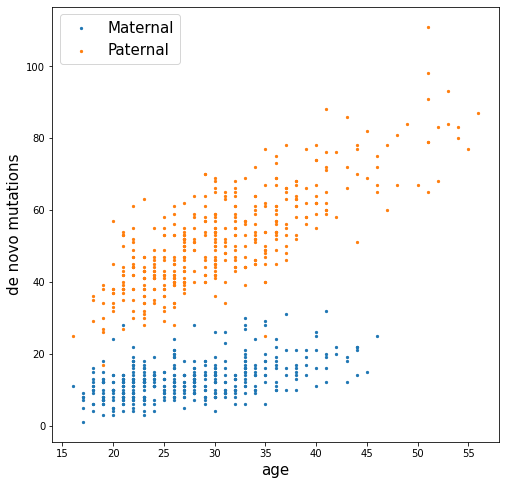

In [9]:
#Plot the count of maternal de novo mutations vs. maternal age 
#Plot the count of paternal de novo mutations vs. paternal age
fig, ax = plt.subplots(figsize = (8,8))

#maternal de novo mutations vs. maternal age 
ax.scatter(total_df.loc[:,"Mother_age"],total_df.loc[:,"mat_dnm"], s = 5, label = "Maternal")
#paternal de novo mutations vs. paternal age
ax.scatter(total_df.loc[:,"Father_age"],total_df.loc[:,"pat_dnm"],  s = 5, label = "Paternal")
ax.set_ylabel("de novo mutations", size = 15)
ax.set_xlabel("age", size = 15)

ax.legend(fontsize = 15)

plt.show()

## Question6

In [10]:
#test for an association between maternal age and maternally inherited de novo mutations
m_mut = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = total_df).fit()

m_mut.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        09:23:53   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship is significant (p value close to 0). The size of the relationship is 0.3776.

## Question 7

In [11]:
#test for an association between maternal age and maternally inherited de novo mutations
p_mut = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = total_df).fit()

p_mut.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        09:23:53   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship is significant (p value close to 0). The size of the relationship is 1.3538.

## Question 8

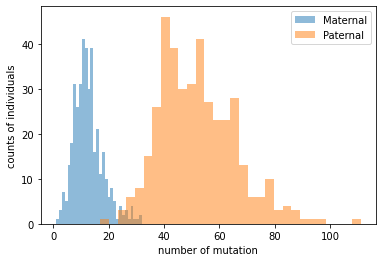

In [12]:
his_df = total_df.set_index("Proband_id")

fig, ax = plt.subplots()
ax.hist(his_df.loc[:, "mat_dnm"], bins = 30, alpha = 0.5, label = "Maternal")
ax.hist(his_df.loc[:, "pat_dnm"], bins = 30, alpha = 0.5, label = "Paternal")
ax.set_xlabel("number of mutation")
ax.set_ylabel("counts of individuals")

ax.legend()

plt.show()

## Question 9

In [13]:
#t-test to determine whether the number of maternally inherited 
# de novo mutations per proband is significantly different than the 
# number of paternally inherited de novo mutations per proband.

smf.ols(formula = "pat_dnm ~ 1 + mat_dnm", data = total_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     65.71
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.66e-15
Time:                        09:23:53   Log-Likelihood:                -1567.0
No. Observations:                 396   AIC:                             3138.
Df Residuals:                     394   BIC:                             3146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1337      1.712     22.855      0.000      35.767      42.500
mat_dnm        1.0079      0.124      8.106      0.000       0.763       1.252
==============================================================================
Omnibus:                       34.430   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.747
Skew:                           0.633   Prob(JB):                     4.28e-11
Kurtosis:                       4.137   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 10

In [14]:
#test for an association between maternal age and maternally inherited de novo mutations using Poisson model
dnm_mom = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = total_df).fit()
dnm_mom.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        09:23:53   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [15]:
#test for an association between paternal age and paternally inherited de novo mutations using Poisson model
dnm_dad = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = total_df).fit()
dnm_dad.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        09:23:53   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [16]:
#test for an association between paternal mutation and maternal inherited de novo mutations using Poisson model
pat_mat = smf.poisson(formula = "pat_dnm ~ 1 + mat_dnm", data = total_df).fit()
pat_mat.summary()

Optimization terminated successfully.
         Current function value: 4.384364
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.05379
Time:                        09:23:53   Log-Likelihood:                -1736.2
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                 7.684e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7100      0.019    199.212      0.000       3.674       3.747
mat_dnm        0.0185      0.001     14.260      0.000       0.016       0.021
==============================================================================
"""

In [17]:
new_observation = pd.DataFrame({
    "Father_age": [50.5]
})

dnm_dad.predict(new_observation)

0    82.031316
dtype: float64